# Homework I

In [60]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_curve, RocCurveDisplay

In [61]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


![alt text](img.png "Title")

## One-hot encoding of categorical columns

cp and restecg are both categorical variables, which aren't represented by boolean value, so we use one-hot encoding for them.

In [63]:
data = pd.get_dummies(data, columns = ['cp', 'restecg'])
data.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,0,1,1,0,0,0,1,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,2,1,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,2,1,0,1,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,2,0,2,1,0,1,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,2,1,1,0,0,0,0,1,0


## Scaling continuous data

We standardize continuous features by removing the mean and scaling to unit variance.

In [64]:
scaler = StandardScaler()
columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
data[columns] = scaler.fit_transform(data[columns])
data.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2
0,0.952197,1,0.763956,-0.256334,1,0.015443,0,1.087338,0,0,1,1,0,0,0,1,1,0,0
1,-1.915313,1,-0.092738,0.072199,0,1.633471,0,2.122573,0,0,2,1,0,0,1,0,0,1,0
2,-1.474158,0,-0.092738,-0.816773,0,0.977514,0,0.310912,2,0,2,1,0,1,0,0,1,0,0
3,0.180175,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,2,0,2,1,0,1,0,0,0,1,0
4,0.290464,0,-0.663867,2.082050,0,0.583939,1,-0.379244,2,0,2,1,1,0,0,0,0,1,0


## Splitting data into training and test set

In [65]:
x, y = data.drop(columns='output'), data['output']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Metrics

We measure accuracy_score and f1_score, and we display Roc curve of given model.

In [66]:
def metrics(model_name, y_true, y_pred):
    print(f"{model_name}:")
    print(f"    accuracy = {accuracy_score(y_true, y_pred)}")
    print(f"    f1 score = {f1_score(y_true, y_pred)}")


def show_roc(y_true, y_score):
    print("ROC curve:")
    fpr, tpr, _ = roc_curve(y_true, y_score)
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## Model training

In [67]:
def train(model):
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    y_score = model.predict_proba(x_test)[..., 1]

    metrics(str(model), y_test, y_pred)
    show_roc(y_test, y_score)

## Random Forest

RandomForestClassifier():
    accuracy = 0.7868852459016393
    f1 score = 0.8115942028985507
ROC curve:


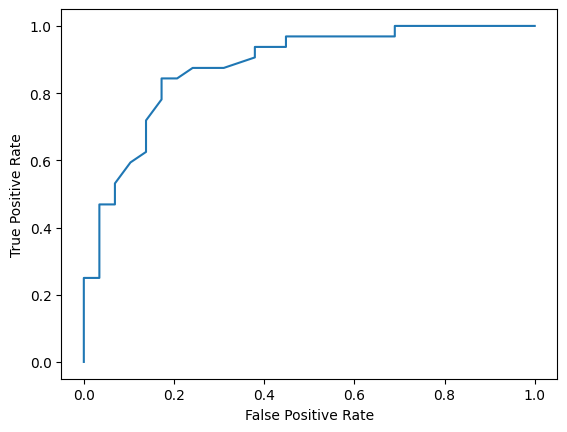

RandomForestClassifier():
    accuracy = 0.819672131147541
    f1 score = 0.8450704225352113
ROC curve:


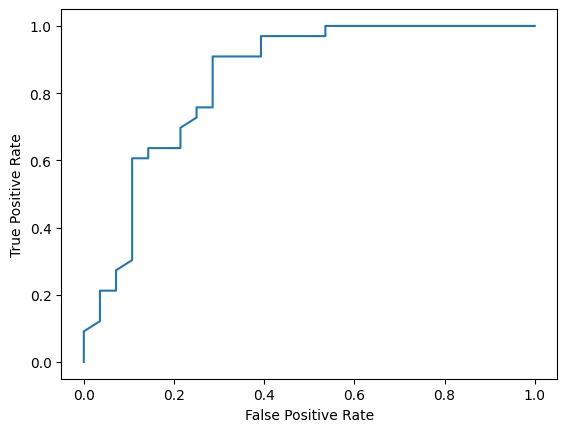

In [68]:
train(RandomForestClassifier())

## Logistic Regression

LogisticRegression():
    accuracy = 0.7704918032786885
    f1 score = 0.7999999999999999
ROC curve:


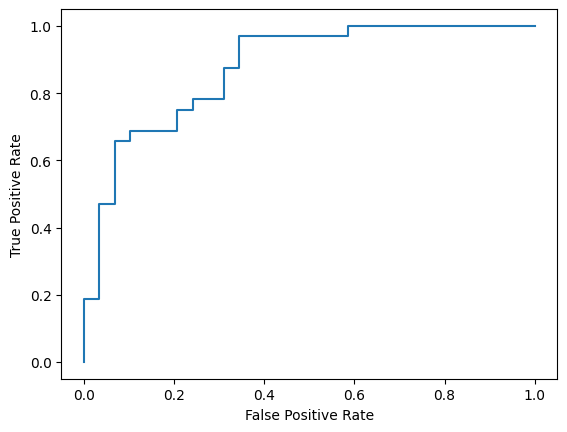

LogisticRegression():
    accuracy = 0.7868852459016393
    f1 score = 0.8115942028985507
ROC curve:


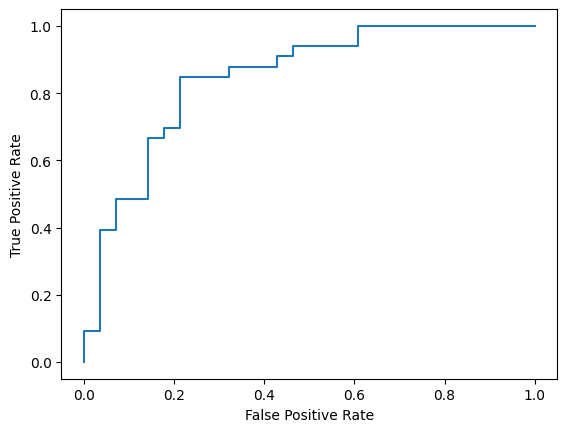

In [69]:
train(LogisticRegression())

## Sumary

I applied basic preprocessing to data. I Added dummy variables for categorical ones and scaled continues ones. Both methods achieved similar results, with logistic regression being slightly better. I used two different metrics: accuracy and f1 score.